In [189]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [222]:
import numpy as np
import tensorflow as tf                              # tensorflow 기본 import
from tensorflow.keras.models import Sequential       # model box 구성
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout # model 안의 input layer와
                                                      # output layer를 구성
from tensorflow.keras.optimizers import Adam         # 알고리즘 담당
import sklearn
from sklearn.model_selection import train_test_split # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler       # 데이터 정규화
                                                      # 컴퓨터가 큰숫자를 작은숫자로 변경
                                                      # 0~1사이 실수 값으로 변경

In [223]:
import pandas as pd
df = pd.read_csv("../data/diabetes.csv")   #Pima Indians Diabetes : pima 인디언 당뇨 발생
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [224]:
df = df.dropna()
df.shape

(768, 9)

In [225]:
cols = df.keys()
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [226]:
df.shape

(768, 9)

In [227]:
# 독립변수와 종속변수를 분리해야 해요.
x_data = df.drop('Outcome', axis=1, inplace=False)  # 2 차원 협태의 pixel(28 * 28)
y_data = df['Outcome']    # 1차원

In [228]:
x_data.shape

(768, 8)

In [229]:
y_data.shape

(768,)

In [230]:
# pixel data(x_data) 를 정규화(0~1사이의 실수값으로 변화)

scaler = MinMaxScaler()
scaler.fit(x_data)        # scaler를 학습시키고 - min, max
norm_x_data = scaler.transform(x_data)  # scaler 를 통해서 실제로 값을 변환(0 ~ 1 변경)

In [231]:
norm_x_data.shape

(768, 8)

In [232]:
norm_x_data

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [233]:
x_train, x_test, y_train, y_test = train_test_split(norm_x_data, y_data, test_size=0.2, random_state=42)

In [234]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_data.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # 이진 분류니까 sigmoid
])

C:\Users\user\anaconda3\envs\python\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [235]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [236]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [237]:
hist = model.fit(x_train,
          y_train,
          epochs=100,
          batch_size = 64,
          verbose=1,
          validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5495 - loss: 0.6928 - val_accuracy: 0.6179 - val_loss: 0.6806
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5971 - loss: 0.6768 - val_accuracy: 0.6098 - val_loss: 0.6727
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6763 - loss: 0.6648 - val_accuracy: 0.6098 - val_loss: 0.6676
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6779 - loss: 0.6503 - val_accuracy: 0.6098 - val_loss: 0.6654
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6693 - loss: 0.6404 - val_accuracy: 0.6098 - val_loss: 0.6630
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6688 - loss: 0.6546 - val_accuracy: 0.6098 - val_loss: 0.6585
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6478 - loss: 0.6558 - val_accuracy: 0.6098 - val_loss: 0.6538
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6763 - loss: 0.6374 - val_accuracy: 0.6098 - val_loss:

20/20 [==============================] - 0s 10ms/step - loss: 0.2129 - accuracy: 0.6710 - val_loss: 0.2329 - val_accuracy: 0.6494
Epoch 59/400
20/20 [==============================] - 0s 12ms/step - loss: 0.2116 - accuracy: 0.6759 - val_loss: 0.2317 - val_accuracy: 0.6429
Epoch 60/400
20/20 [==============================] - 0s 16ms/step - loss: 0.2141 - accuracy: 0.6743 - val_loss: 0.2326 - val_accuracy: 0.6494
Epoch 61/400
20/20 [==============================] - 0s 14ms/step - loss: 0.2106 - accuracy: 0.6759 - val_loss: 0.2337 - val_accuracy: 0.6494
Epoch 62/400
20/20 [==============================] - 0s 11ms/step - loss: 0.2102 - accuracy: 0.6775 - val_loss: 0.2312 - val_accuracy: 0.6494
Epoch 63/400
20/20 [==============================] - 0s 12ms/step - loss: 0.2100 - accuracy: 0.6824 - val_loss: 0.2342 - val_accuracy: 0.6494
Epoch 64/400
20/20 [==============================] - 0s 13ms/step - loss: 0.2144 - accuracy: 0.6678 - val_loss: 0.2314 - val_accuracy: 0.6494
Epoch 65/400

20/20 [==============================] - 0s 9ms/step - loss: 0.1805 - accuracy: 0.7296 - val_loss: 0.2473 - val_accuracy: 0.6364
Epoch 116/400
20/20 [==============================] - 0s 9ms/step - loss: 0.1811 - accuracy: 0.7362 - val_loss: 0.2502 - val_accuracy: 0.6494
Epoch 117/400
20/20 [==============================] - 0s 9ms/step - loss: 0.1789 - accuracy: 0.7280 - val_loss: 0.2489 - val_accuracy: 0.6169
Epoch 118/400
20/20 [==============================] - 0s 9ms/step - loss: 0.1828 - accuracy: 0.7182 - val_loss: 0.2482 - val_accuracy: 0.6039
Epoch 119/400
20/20 [==============================] - 0s 9ms/step - loss: 0.1817 - accuracy: 0.7248 - val_loss: 0.2501 - val_accuracy: 0.6299
Epoch 120/400
20/20 [==============================] - 0s 9ms/step - loss: 0.1805 - accuracy: 0.7231 - val_loss: 0.2521 - val_accuracy: 0.6299
Epoch 121/400
20/20 [==============================] - 0s 9ms/step - loss: 0.1775 - accuracy: 0.7459 - val_loss: 0.2491 - val_accuracy: 0.6299
Epoch 122/400

20/20 [==============================] - 0s 15ms/step - loss: 0.1348 - accuracy: 0.8046 - val_loss: 0.2681 - val_accuracy: 0.6299
Epoch 173/400
20/20 [==============================] - 0s 16ms/step - loss: 0.1378 - accuracy: 0.8062 - val_loss: 0.2666 - val_accuracy: 0.6299
Epoch 174/400
20/20 [==============================] - 0s 22ms/step - loss: 0.1318 - accuracy: 0.8046 - val_loss: 0.2722 - val_accuracy: 0.6169
Epoch 175/400
20/20 [==============================] - 0s 11ms/step - loss: 0.1342 - accuracy: 0.8111 - val_loss: 0.2668 - val_accuracy: 0.6234
Epoch 176/400
20/20 [==============================] - 0s 9ms/step - loss: 0.1312 - accuracy: 0.8225 - val_loss: 0.2667 - val_accuracy: 0.6299
Epoch 177/400
20/20 [==============================] - 0s 10ms/step - loss: 0.1340 - accuracy: 0.7948 - val_loss: 0.2706 - val_accuracy: 0.6234
Epoch 178/400
20/20 [==============================] - 0s 16ms/step - loss: 0.1305 - accuracy: 0.8094 - val_loss: 0.2696 - val_accuracy: 0.6299
Epoch 1

20/20 [==============================] - 0s 9ms/step - loss: 0.0865 - accuracy: 0.8958 - val_loss: 0.3080 - val_accuracy: 0.5584
Epoch 230/400
20/20 [==============================] - 0s 15ms/step - loss: 0.0883 - accuracy: 0.8909 - val_loss: 0.3136 - val_accuracy: 0.5584
Epoch 231/400
20/20 [==============================] - 0s 9ms/step - loss: 0.0872 - accuracy: 0.8958 - val_loss: 0.3159 - val_accuracy: 0.5714
Epoch 232/400
20/20 [==============================] - 0s 9ms/step - loss: 0.0855 - accuracy: 0.8974 - val_loss: 0.3146 - val_accuracy: 0.5584
Epoch 233/400
20/20 [==============================] - 0s 10ms/step - loss: 0.0846 - accuracy: 0.9055 - val_loss: 0.3128 - val_accuracy: 0.5649
Epoch 234/400
20/20 [==============================] - 0s 9ms/step - loss: 0.0833 - accuracy: 0.9121 - val_loss: 0.3157 - val_accuracy: 0.5584
Epoch 235/400
20/20 [==============================] - 0s 8ms/step - loss: 0.0836 - accuracy: 0.8990 - val_loss: 0.3122 - val_accuracy: 0.5649
Epoch 236/4

20/20 [==============================] - 0s 12ms/step - loss: 0.0480 - accuracy: 0.9609 - val_loss: 0.3400 - val_accuracy: 0.5519
Epoch 287/400
20/20 [==============================] - 0s 17ms/step - loss: 0.0486 - accuracy: 0.9511 - val_loss: 0.3393 - val_accuracy: 0.5649
Epoch 288/400
20/20 [==============================] - 0s 13ms/step - loss: 0.0493 - accuracy: 0.9511 - val_loss: 0.3397 - val_accuracy: 0.5649
Epoch 289/400
20/20 [==============================] - 0s 15ms/step - loss: 0.0472 - accuracy: 0.9528 - val_loss: 0.3391 - val_accuracy: 0.5584
Epoch 290/400
20/20 [==============================] - 0s 14ms/step - loss: 0.0460 - accuracy: 0.9528 - val_loss: 0.3496 - val_accuracy: 0.5390
Epoch 291/400
20/20 [==============================] - 0s 12ms/step - loss: 0.0424 - accuracy: 0.9609 - val_loss: 0.3480 - val_accuracy: 0.5519
Epoch 292/400
20/20 [==============================] - 0s 11ms/step - loss: 0.0436 - accuracy: 0.9577 - val_loss: 0.3336 - val_accuracy: 0.5779
Epoch 

20/20 [==============================] - 0s 10ms/step - loss: 0.0202 - accuracy: 0.9902 - val_loss: 0.3493 - val_accuracy: 0.5909
Epoch 344/400
20/20 [==============================] - 0s 9ms/step - loss: 0.0264 - accuracy: 0.9821 - val_loss: 0.3578 - val_accuracy: 0.5714
Epoch 345/400
20/20 [==============================] - 0s 16ms/step - loss: 0.0271 - accuracy: 0.9788 - val_loss: 0.3429 - val_accuracy: 0.5909
Epoch 346/400
20/20 [==============================] - 0s 15ms/step - loss: 0.0231 - accuracy: 0.9902 - val_loss: 0.3622 - val_accuracy: 0.5519
Epoch 347/400
20/20 [==============================] - 0s 10ms/step - loss: 0.0263 - accuracy: 0.9821 - val_loss: 0.3373 - val_accuracy: 0.6039
Epoch 348/400
20/20 [==============================] - 0s 9ms/step - loss: 0.0203 - accuracy: 0.9853 - val_loss: 0.3335 - val_accuracy: 0.5909
Epoch 349/400
20/20 [==============================] - 0s 10ms/step - loss: 0.0200 - accuracy: 0.9886 - val_loss: 0.3420 - val_accuracy: 0.5844
Epoch 35

20/20 [==============================] - 0s 12ms/step - loss: 0.0098 - accuracy: 0.9935 - val_loss: 0.3476 - val_accuracy: 0.5974


In [238]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7138 - loss: 0.5471 


[0.5377306938171387, 0.7402597665786743]

In [207]:
model.evaluate(norm_x_data, y_data)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.4506 


[0.42912372946739197, 0.8020833134651184]

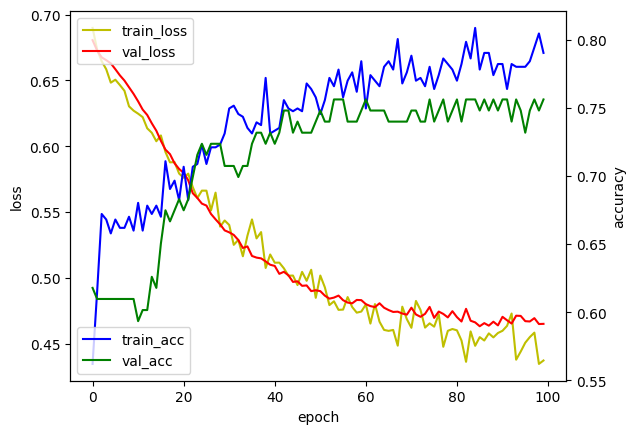

In [239]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [240]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [333]:
pred_x_data = np.array([[6, 100, 80, 35, 0, 20.6, 0.607, 50],
                        [1, 45, 66, 29, 0, 26.6, 0.351, 31]])
pred_x_data

array([[  6.   , 100.   ,  80.   ,  35.   ,   0.   ,  20.6  ,   0.907,
         50.   ],
       [  1.   ,  45.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ]])

In [334]:
pred_x_data.shape

(2, 8)

In [335]:
predic_x_data = scaler.transform(pred_x_data)

C:\Users\user\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [336]:
model.predict(predic_x_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.4461178 ],
       [0.04714554]], dtype=float32)